In [ ]:
from nltk.util import ngrams
from collections import Counter
from nltk.corpus import stopwords

**PART III**

In [ ]:
from nltk.util import ngrams
from collections import Counter
from nltk.corpus import stopwords

In [ ]:
def part_3(input_file, graph_output):
  with open(input_file,"r") as tokens:
      text=tokens.read()

  word_tokens=nltk.word_tokenize(text)
  print("total word_tokens:", len(word_tokens))

  ## Part 1:
  unique_words=list(set(word_tokens))
  print("Part 1:")
  print("Total unique types:  ",len(unique_words),"\n")

  ## Part 2:
  val_total=[]
  unigrams = ngrams(word_tokens,1)
  c=Counter(unigrams)
  print("Part 2:")
  print("Total unigram tokens",len(c),"\n")

  ## Part 3:
  import numpy as np
  import matplotlib.pylab as plt
  frequency={}
  for x, y in c.items():
      for key in x:
          frequency.update({key:y})
      
  freq = frequency.values()
  f = list(freq)
  f.sort(reverse=True)
  ranks = range(1, len(f)+1)
  plt.plot(ranks, f)
  plt.ylabel('log(frequency)')
  plt.xlabel('log(rank)')
  plt.yscale('log')
  plt.xscale('log')
  plt.savefig(graph_output)


  ## Part 4:
  print("Part 4:")
  print("The 30 most frequent words are:  \n")
  for val, count in c.most_common(30):
      for tups in val:
          print(tups,count)
          val_total.append(tups)
          
  ## Part 5:
  stop_words = set(stopwords.words('english'))
  filtered_sentence = []  
  for w in word_tokens:  
      lowerword=w.lower()
      if lowerword not in stop_words:  
          filtered_sentence.append(w)  

  #print(filtered_sentence) 

  ## Part 6

  print("\n Part 5/6:")
  print("The 30 most frequent words after removing stop words:  \n")
  val_total_remov_stop=[]
  unigrams_new = ngrams(filtered_sentence,1)
  c_new=Counter(unigrams_new)
  for val, count in c_new.most_common(30):
      for tups in val:
        print(tups,count)
        val_total_remov_stop.append(tups)



total word_tokens: 16416618
Part 1:
Total unique types:   138420 

Part 2:
Total unigram tokens 138420 

Part 4:
The 30 most frequent words are:  

THE 1219252
TO 511901
OF 505729
AND 397237
IN 366589
A 292772
THAT 213959
SAID 182444
FOR 161746
TAIWAN 156616
ON 137044
WILL 119408
WITH 118781
IS 113043
AT 100494
AS 99989
BY 98934
HE 87063
BE 80622
FROM 80583
HAS 76043
WAS 62642
CHINA 58284
AN 57912
PERCENT 56560
ITS 55761
HAVE 54168
NOT 53478
IT 52786
HIS 52227

 Part 5/6:
The 30 most frequent words after removing stop words:  

SAID 182444
TAIWAN 156616
CHINA 58284
PERCENT 56560
ALSO 46602
TAIWANS 46425
CHEN 42420
GOVERNMENT 41490
PRESIDENT 39952
TAIPEI 36700
YEAR 36304
TWO 33265
MAINLAND 32436
NEW 31262
PEOPLE 29547
CHINESE 28906
ACCORDING 28557
ECONOMIC 26985
US 26659
PARTY 24495
BILLION 24212
FIRST 24029
NATIONAL 23910
ONE 23843
FOREIGN 23515
WOULD 22702
YEARS 22394
INTERNATIONAL 21710
OFFICIALS 21655
LOCAL 21156


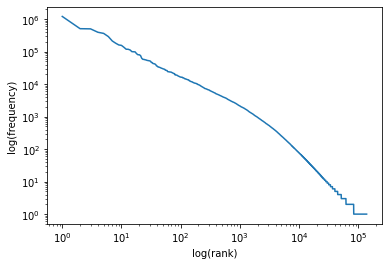

In [ ]:
input_file="/content/sample_data/word_tokenization_result.txt"
graph_output="/content/sample_data/rand_and_freq.png"
part_3(input_file,graph_output)

Before removal of stop words, the 30 most frequent word list is more kind of stop words and not meaning ful words. There are few words in english "stopwords" collections which are letters rather than words. Also, there are few words which has no meanings in english. We could add other words in the stopwords list but I did not get a chance to work on it due to time limitations.

**PART IV** - Word association metrics


In [ ]:
def total_token_count(ngram_dict):
    return sum(ngram_dict.values())

In [ ]:
def total_type_count(ngram_dict):
    return len(ngram_dict.values())

In [ ]:
def intdefaultdict():
    return collections.defaultdict(int)

In [ ]:
def load_object(filename):
    with open(filename, 'rb') as object_file_stream:
        return pickle.load(object_file_stream)

In [ ]:
def file_to_unigram_dict(input_file="/content/sample_data/word_tokenization_result.txt",
                         output_file='/content/sample_data/unigram_count_dict.pkl',):

    unigram_count_dict = collections.defaultdict(int)
    with open(input_file, 'r') as input_stream:
        line = input_stream.readline()
        while line:
            split_line = line[:-1].split(' ')
            for token in split_line:
                unigram_count_dict[token] += 1
            line = input_stream.readline()

    with open(output_file, 'wb') as output:
        pickle.dump(unigram_count_dict, output, pickle.HIGHEST_PROTOCOL)

In [ ]:
def file_to_bigram_dict(input_file='/content/sample_data/word_tokenization_result.txt',
                        output_file='/content/sample_data/bigram_count_dict.pkl'):

    bigram_count_dict = collections.defaultdict(intdefaultdict)
    with open(input_file, 'r') as input_stream:
        line = input_stream.readline()
        while line:
            split_line = line[:-1].split(' ')
            for i in range(len(split_line)-1):
                bigram_count_dict[split_line[i]][split_line[i+1]] += 1
            line = input_stream.readline()

    with open(output_file, 'wb') as output:
        pickle.dump(bigram_count_dict, output, pickle.HIGHEST_PROTOCOL)

In [ ]:
def unigram_probabilities(ngram_dict, threshold=0):
    
    unigram_prob_dict = collections.defaultdict(float)
    token_count = float(total_token_count(ngram_dict))
    for token_type in ngram_dict:
        if ngram_dict[token_type] > threshold:
            prob = float(ngram_dict[token_type])/token_count
            unigram_prob_dict[token_type] = prob

    return unigram_prob_dict

In [ ]:
def bigram_probabilities(bigram_dict, threshold=0):

    bigram_prob_dict = collections.defaultdict(intdefaultdict)
    for previous_token in bigram_dict:
        prev_prob = unigram_probabilities(bigram_dict[previous_token],
                                              threshold)
        bigram_prob_dict[previous_token] = prev_prob

    return bigram_prob_dict

In [ ]:
def get_pmi(input_bigram='/content/sample_data/bigram_count_dict.pkl',
            input_unigram='/content/sample_data/unigram_count_dict.pkl',
            threshold=0):


    bigram_count_dict = load_object(input_bigram)
    unigram_count_dict = load_object(input_unigram)

    bigram_prob_dict = bigram_probabilities(bigram_count_dict, threshold)
    unigram_prob_dict = unigram_probabilities(unigram_count_dict)

    pmi_list = list()

    for item in bigram_prob_dict:
        for token in bigram_prob_dict[item]:
            pmi = bigram_prob_dict[item][token]/unigram_prob_dict[token]
            pmi_list.append([pmi, item, token])
    pmi_list.sort(reverse=True, key=lambda pair: pair[0])
    return pmi_list

In [ ]:
file_to_unigram_dict()
file_to_bigram_dict()

In [ ]:
pmi_list_thresh_0 = get_pmi()
print("30 highest PMI pairs with threshold 0 are: ")
for index in range(30): print(pmi_list_thresh_0[index])

# With a threshold of 100, what are the 10 highest-PMI word pairs?
pmi_list_thresh_100 = get_pmi(threshold=100)
print("\n 10 highest PMI pairs with threshold 100 are: \n")
for index in range(10): print(pmi_list_thresh_100[index])

# Experiment with a few different threshold values, and report on what you observe.

pmi_list_thresh_300 = get_pmi(threshold=300)
print("\n 10 highest PMI pairs with threshold 300 are: \n")
for index in range(10): print(pmi_list_thresh_300[index])

pmi_list_thresh_1000 = get_pmi(threshold=1000)
print("\n 10 highest PMI pairs with threshold 1000 are: \n")
for index in range(10): print(pmi_list_thresh_1000[index])
print("\n PMI for “New York”: \n")
for pmi_itter in pmi_list_thresh_0:
	if pmi_itter[1] == 'NEW' and pmi_itter[2] == 'YORK':
		print(pmi_itter)

30 highest PMI pairs with threshold 0 are: 
[16416631.0, 'HANNES', 'FARLEITER']
[16416631.0, 'FREIE', 'DEMOKRATISCHE']
[16416631.0, 'CEP006', '100397']
[16416631.0, 'NICOSIA', 'GORGIE']
[16416631.0, 'GORGIE', 'MURADOV']
[16416631.0, 'CAUSUS', 'BELLI']
[16416631.0, 'HARDCOVER', 'GILTEDGED']
[16416631.0, 'US1457', 'US1522']
[16416631.0, 'FAYEZ', 'ZAWARNEH']
[16416631.0, 'CEP002', '100797']
[16416631.0, 'NN1', 'NN2']
[16416631.0, 'TULAGA', 'MANUELLA']
[16416631.0, 'LUCILLE', 'ROYBALALLARD']
[16416631.0, 'HALLDOR', 'ASGRIMSSON']
[16416631.0, 'WAHYO', 'DJATMIKO']
[16416631.0, 'FLAVONOID', 'SPONIN']
[16416631.0, 'ZCCZ', 'CEP007']
[16416631.0, 'CEP007', '101097']
[16416631.0, 'FRIEDRICH', 'NAUMANN']
[16416631.0, 'ANDRIS', 'AMERIKS']
[16416631.0, 'GERMANIC', 'MANHOOD']
[16416631.0, 'HIMMLERS', 'NUTTY']
[16416631.0, 'ZAIMAN', 'NURMATIAS']
[16416631.0, 'ESTRADE', 'OYUELA']
[16416631.0, 'TOFILAU', 'ETI']
[16416631.0, 'STEPAN', 'KERKYASHARIAN']
[16416631.0, 'ARY', 'MARDJONO']
[16416631.0, 'MESUT',

**The PMI for "New York" is comparatively very low. In my understanding the conditional probabily is low since the word "NEW" is very common with any other word other then "YORK". "NEW" can pair frequently with other words also.**